In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib notebook
# from mpl_toolkits.mplot3d import axes3d
# from ipywidgets import interact, fixed
# import ipywidgets as widgets
# from tqdm import tqdm_notebook as tqdm

# from ipywidgets import interactive, interact, HBox, Layout, VBox


In [2]:
list_of_positions = [(16,19,110, 0, 0, 0), # 00 good, approaching high values of phi from high gamma
                     (16,25,110, 0, 0, 0), # 01 good, approaching high values of phi from low gamma
                     (18,30, 90, 0, 0, 0), # 02 another angle of attack
                     (20,30,110, 0, 0, 0), # 03 this is the area where the green seems to accumulate
                     (17,19,110, 2, 2, 6), # 04 initial cube
                     (17,25,108, 2, 2, 6), # 05 final cube
                     (25,30,101, 0, 0, 0), # 06 things go well
                     (25,28,99, 4, 5, 14), # 07 this is the wavefunction I want to cut out from IR runs. And now from the UV on Z
                     (22,22,110, 7, 7, 20), # 08 I want a cube that defines CI part  CI_MASK IS THIS ONE
                     (16, 22, 110, 0, 0, 0), # 09 this point is the CI itself
                     (16, 19, 125, 0, 0, 0), # 10 this is "after" the CI
                     (16, 26, 100, 0, 0, 0), # 11 this is "before" the CI
                     (25, 26, 100, 0, 0, 0), # 12 This is the one on 90 times
                     (17, 29, 118, 0, 0, 0), # 13 This is where s1 seems to transfer in s0
                     (29, 28, 55, 0, 0, 0), # 14 this is MINIMUM
                     (21, 26, 118, 0, 0, 0), # 15 This is IN THE MIDDLE OF 74 ball
                     (27, 17, 90, 0, 0, 0), # 16 This is HIGH GAMMA EXTREME OF 90 ball
                     (25,28,99, 4, 5, 14), # 17 this is the wavefunction I want to cut out from IR runs. Little bigger now for the UV on Z
                     (27,26,85, 2, 2, 24), # 18 this is to try to take out coherence and energy differences from 2-3.
                    ]

folder = '/home/alessio/Desktop/d-projectExplorer/positions'
folder = '/home/alessio/IMPORTANTS/VISUALIZE_POINTS'
qp.ensure_dir(folder)

zero_vector = np.zeros((55,56,160))

a = 0

for x in list_of_positions:
    new = np.zeros_like(zero_vector)
    p, g, t, hms_p, hms_g, hms_t = x
    new[p-hms_p:p+hms_p+1,g-hms_g:g+hms_g+1,t-hms_t:t+hms_t+1] = 1
    dictio = {}
    dictio['Position'] = new
    dictio['lab'] = '({},{},{}) ({} {} {})'.format(p, g, t, hms_p, hms_g, hms_t)
    filename = os.path.join(folder,'Position{:04}.h5'.format(a))
    a+=1
    qp.writeH5fileDict(filename, dictio)


In [6]:
def findfile(tup):
    '''
    from the non extrapolated cube to the calculations file names
    '''
    a,b,c,_,_,_ = tup
    phisL = ['N007-000', 'N006-500', 'N006-000', 'N005-500', 'N005-000', 'N004-500', 'N004-000', 'N003-500', 'N003-000', 'N002-500', 'N002-000', 'N001-500', 'N001-000', 'N000-500', 'P000-000', 'P000-500',
     'P001-000', 'P001-500', 'P002-000', 'P002-500', 'P003-000', 'P003-500', 'P004-000', 'P004-500', 'P005-000']
    gamsL = ['P012-308','P012-615','P012-923','P013-231','P013-538','P013-846','P014-154','P014-462','P014-769','P015-077','P015-385','P015-692','P016-000','P016-308','P016-615','P016-923','P017-231','P017-538','P017-846','P018-154','P018-462','P018-769','P019-077','P019-385','P019-692','P020-000']
    thesL = ['P124-190','P123-743','P123-296','P122-849','P122-402','P121-955','P121-508','P121-061','P120-615','P120-168','P119-721','P119-274','P118-827','P118-380','P117-933','P117-486','P117-039','P116-592','P116-145','P115-698','P115-251','P114-804','P114-358','P113-911','P113-464','P113-017','P112-570','P112-123','P111-676','P111-229','P110-782','P110-335','P109-888','P109-441','P108-994','P108-547','P108-101','P107-654','P107-207','P106-760','P106-313','P105-866','P105-419','P104-972','P104-525','P104-078','P103-631','P103-184','P102-737','P102-291','P101-844','P101-397','P100-950','P100-503','P100-056','P099-609','P099-162','P098-715','P098-268','P097-821','P097-374','P096-927','P096-480','P096-034','P095-587','P095-140','P094-693','P094-246','P093-799','P093-352','P092-905','P092-458','P092-011','P091-564','P091-117','P090-670','P090-223','P089-777','P089-330','P088-883','P088-436','P087-989','P087-542','P087-095','P086-648','P086-201','P085-754','P085-307','P084-860','P084-413','P083-966','P083-520','P083-073','P082-626','P082-179','P081-732','P081-285','P080-838','P080-391','P079-944']
    file = 'zNorbornadiene_{}_{}_{}.rasscf.h5'.format(phisL[a-15], gamsL[b-15], thesL[c-30])
    return(file)

for i, filez in enumerate(list_of_positions):
    name = findfile(filez)
    print('{} -> {} -> {}'.format(i, filez, name))

0 -> (16, 19, 110, 0, 0, 0) -> zNorbornadiene_N006-500_P013-538_P088-436.rasscf.h5
1 -> (16, 25, 110, 0, 0, 0) -> zNorbornadiene_N006-500_P015-385_P088-436.rasscf.h5
2 -> (18, 30, 90, 0, 0, 0) -> zNorbornadiene_N005-500_P016-923_P097-374.rasscf.h5
3 -> (20, 30, 110, 0, 0, 0) -> zNorbornadiene_N004-500_P016-923_P088-436.rasscf.h5
4 -> (17, 19, 110, 2, 2, 6) -> zNorbornadiene_N006-000_P013-538_P088-436.rasscf.h5
5 -> (17, 25, 108, 2, 2, 6) -> zNorbornadiene_N006-000_P015-385_P089-330.rasscf.h5
6 -> (25, 30, 101, 0, 0, 0) -> zNorbornadiene_N002-000_P016-923_P092-458.rasscf.h5
7 -> (25, 28, 99, 4, 5, 14) -> zNorbornadiene_N002-000_P016-308_P093-352.rasscf.h5
8 -> (22, 22, 110, 7, 7, 20) -> zNorbornadiene_N003-500_P014-462_P088-436.rasscf.h5
9 -> (16, 22, 110, 0, 0, 0) -> zNorbornadiene_N006-500_P014-462_P088-436.rasscf.h5
10 -> (16, 19, 125, 0, 0, 0) -> zNorbornadiene_N006-500_P013-538_P081-732.rasscf.h5
11 -> (16, 26, 100, 0, 0, 0) -> zNorbornadiene_N006-500_P015-692_P092-905.rasscf.h5
12

|number  | state | new bond | old bond | description |
| ---    |   --- |    ---   |  ---     | --- |
| 13     | s1    | 5.441 | 3.500 | Where there is actual transfer along CI 
| 13     | s0    | 5.345 | 3.449 | 
| 12     | s1    | 4.540 | 3.456 | 90 fs center 
| 12     | s0    | 4.532 | 3.508 |  
| 11     | s1    | 3.575 | 4.916 | BEFORE (low phi) 
| 11     | s0    | 3.519 | 4.860 | 
| 10     | s1    | 4.425 | 3.661 | AFTER (low phi) 
| 10     | s0    | 4.392 | 3.644 | 


In [4]:
def cut_out_wf(wf_name,tupleZ,outname):
    wf = qp.retrieve_hdf5_data(wf_name,'WF')
    time = qp.retrieve_hdf5_data(wf_name,'Time')
    mask = np.zeros_like(wf)
    p, g, t, hms_p, hms_g, hms_t = tupleZ
    mask[p-hms_p:p+hms_p+1,g-hms_g:g+hms_g+1,t-hms_t:t+hms_t+1] = 1
    new_wf2 = wf * mask
    new_wf = new_wf2/(np.linalg.norm(new_wf2))
    new_wf_file = {'Time': time, 'WF': new_wf}
    qp.writeH5fileDict(outname,new_wf_file)


# here I want to save IR NOR and IR INV into two different files
wf_name = '/home/alessio/w-August-Run/m-IR-Polarized-NOR_0000/Gaussian0045.h5'
outname = '/home/alessio/Desktop/d-projectExplorer/positions/Gaussian0000.h5'
    
#wf_name = '/home/alessio/w-August-Run/m-IR-Polarized-INV_0000/Gaussian0045.h5'
#outname = '/home/alessio/Desktop/d-projectExplorer/positions/Gaussian0001.h5'
tupleZ = (25,28,99, 4, 5, 14)


cut_out_wf(wf_name, tupleZ, outname)

# Take Dipoles Matrices

In [5]:
name_data_file = '/home/alessio/NAC_smoothing/LESSMASS/2019-May-smoothNacONLY.pickle'

data = qp.pickleLoad(name_data_file)
print('Pickle loaded')
data.keys()
potential = data['potCube']
potential.shape

Pickle loaded


dict_keys(['dipCUBE', 'kinCube', 'smoCube', 'thes', 'potCube', 'gams', 'phis', 'geoCUBE'])

In [7]:
# the minimum geometry
qp.find_numpy_index_minumum(potential)

(29, 28, 55, 0)

In [10]:
findfile((29, 28, 55,0,0,0))

'zNorbornadiene_P000-000_P016-308_P113-017.rasscf.h5'

In [30]:
# the conical intersection is a little harder to find. The point with minimum difference between 0 and 1 is in the extrapolation regions, in fact. This is why I take the internal cube and THEN I re-add 15-15-30
qp.find_numpy_index_minumum(np.abs(potential[15:-15,15:-15,30:-30,1]-potential[15:-15,15:-15,30:-30,0]))

(0, 2, 71)

In [31]:
def printDipoles(data,p,g,t):
    '''
    from tuple to file of dipoles
    '''
    outf = '/home/alessio/TEMPORALE'
    dipoles = data['dipCUBE']
    this_one = dipoles[p,g,t]
    print(this_one.shape)
    for car in [0,1,2]:
        name = os.path.join(outf,'dipoles_{}_{}_{}_{}.csv'.format(p,g,t,car))
        a = pd.DataFrame(this_one[car],index = ['S0','S1','S2','S3','S4','S5','S6','S7'], columns=['S0','S1','S2','S3','S4','S5','S6','S7'])
        a.to_csv(name)

    
    
printDipoles(data,29,28,55)
printDipoles(data,0+15,2+15,71+30)

(3, 8, 8)
(3, 8, 8)


In [33]:
qp.fromHartoEv(potential[15,17,101,1]-potential[15,17,101,0])

0.21168795729157364

In [14]:
def printDipoles_file(fn):
    '''
    same as above, but for the file
    '''
    outf = '/home/alessio/TEMPORALE/'
    all_data = qp.readWholeH5toDict(fn)
    all_dipoles = all_data['SFS_EDIPMOM']
    this_one = all_dipoles[:,:8,:8]
    root = os.path.basename(fn)
    for car in [0,1,2]:
        name = os.path.join(outf,'dipoles_{}_{}.csv'.format(root,car))
        a = pd.DataFrame(this_one[car], index = ['S0','S1','S2','S3','S4','S5','S6','S7'], columns=['S0','S1','S2','S3','S4','S5','S6','S7'])
        a.to_csv(name)

# this works only when 
# $ ClusterHere.sh front

fn = '/home/alessio/a-MOLCASTEST/fromOpen_3_4.rassi.h5'
printDipoles_file(fn)

# VISUALIZATION OF DETERMINANTS

In [345]:
def which_sym(thing):
    loro = ['B1','A1','B2','A2','A1','B2','B1','A1']
    operations = { 'A1': np.array([1,1,1]),
                   'A2': np.array([1,-1,-1]),
                   'B1': np.array([-1,1,-1]),
                   'B2': np.array([-1,-1,1]),}
    if '2' not in thing:
        infal = 'NA'
    else:
        if 'u' not in thing:
            infal = 'A1'
        else:
            uno = thing.index('u')
            due = thing.index('d')
            value = operations[loro[uno]]*operations[loro[due]]
            result = [ key for key in operations if np.all(operations[key] == value) ]
            infal = result[0]
    return(infal)

xss = ['udud0000','02200000','u20d0000']
[ which_sym(hes) for hes in xss]


['NA', 'A1', 'B2']

In [350]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def visualize_determinants(elements_parsed,name_file):
    fig, ax = plt.subplots(figsize=(10,20))

    ax.annotate('{}'.format(os.path.basename(name_file)), xy=(0.05, 0.05),ha='center', size = 20)

    ax.set_xlim(0,1.1)
    ax.set_ylim(2.5,0)

    # ax.plot(range(10))


    y_initial_position = .1

    for st_index, state in enumerate(elements_parsed):
        name, percentages, det_strings = state

        name_y_position = y_initial_position + (len(percentages)*0.1/2)

        ax.annotate('{}'.format(name), xy=(0.05, name_y_position),ha='center', size = 20)


        for det in range(len(percentages)):

            percentage = percentages[det]
            string_thing = det_strings[det]


            y_shift = 0.1        
            y_position = 0.05 + y_initial_position + y_shift*det

            ax.annotate('{:.1f}%'.format(percentage*100), xy=(0.15, y_position),ha='center', size = 15)
#             print(string_thing)
            sym_of_this = which_sym(string_thing)
            ax.annotate(sym_of_this, xy=(1.05, y_position),ha='center', size = 15)
            
            for i in range(8):
                up_down_string = string_thing[i]
                #
                
                initial_x_pos = 0.2
                dx = 0.1
                x_pos = initial_x_pos + i * dx
                y_pos = 0.01 + y_initial_position + y_shift*det

                
                rect = mpatches.Rectangle((x_pos, y_pos), dx, dx, ec="black", lw=1.0, fill=False)
                ax.add_patch(rect)

                # drawing 
                x2, x1 = initial_x_pos + 0.03 + i * dx, initial_x_pos + 0.07 + i * dx
                y1, y2 = 0.02 + y_initial_position + y_shift*det, 0.09 + y_initial_position + y_shift*det

                arrow1_start = (x1, y1)
                arrow1_stop  = (x1, y2)
                arrow2_start = (x2, y2)
                arrow2_stop  = (x2, y1)
                mutSc = 30

                if up_down_string == '2' or up_down_string == 'd':
                    arrow =  mpatches.FancyArrowPatch(arrow1_start, arrow1_stop, arrowstyle='->', mutation_scale = mutSc, color='r')
                    ax.add_patch(arrow)
                if up_down_string == '2' or up_down_string == 'u':
                    arrow2 = mpatches.FancyArrowPatch(arrow2_start, arrow2_stop, arrowstyle='->', mutation_scale = mutSc, color='r')
                    ax.add_patch(arrow2)

        y_initial_position = y_initial_position + len(percentages)*0.1 + 0.05


    ax.axis('off')

In [354]:
import re
import sys

def parse_out_for_determinants(out):
    
    elements = []
    energies = []

    with open(out,'r') as f:
        a = f.readlines()

    nstate = 0
    for i,line in enumerate(a):
        if re.search('printout of CI-coefficients', line):
            name = 'S{}'.format(nstate)
            energies.append(a[i+1].split()[1])        
            sublist_up_down = []
            sublist_weight = []
            k = 0
            while len(a[i+3+k].split()) == 4:
                thing_parsed = a[i+3+k]
                thing = thing_parsed.split()
                string_up_down = thing[1]
                weigth = float(thing[3])
                if weigth > 0.06:
                    sublist_up_down.append(string_up_down)
                    sublist_weight.append(weigth)
                k += 1
            correct_format = (name,sublist_weight,sublist_up_down)
            elements.append(correct_format)
            nstate += 1
    return(elements,out)



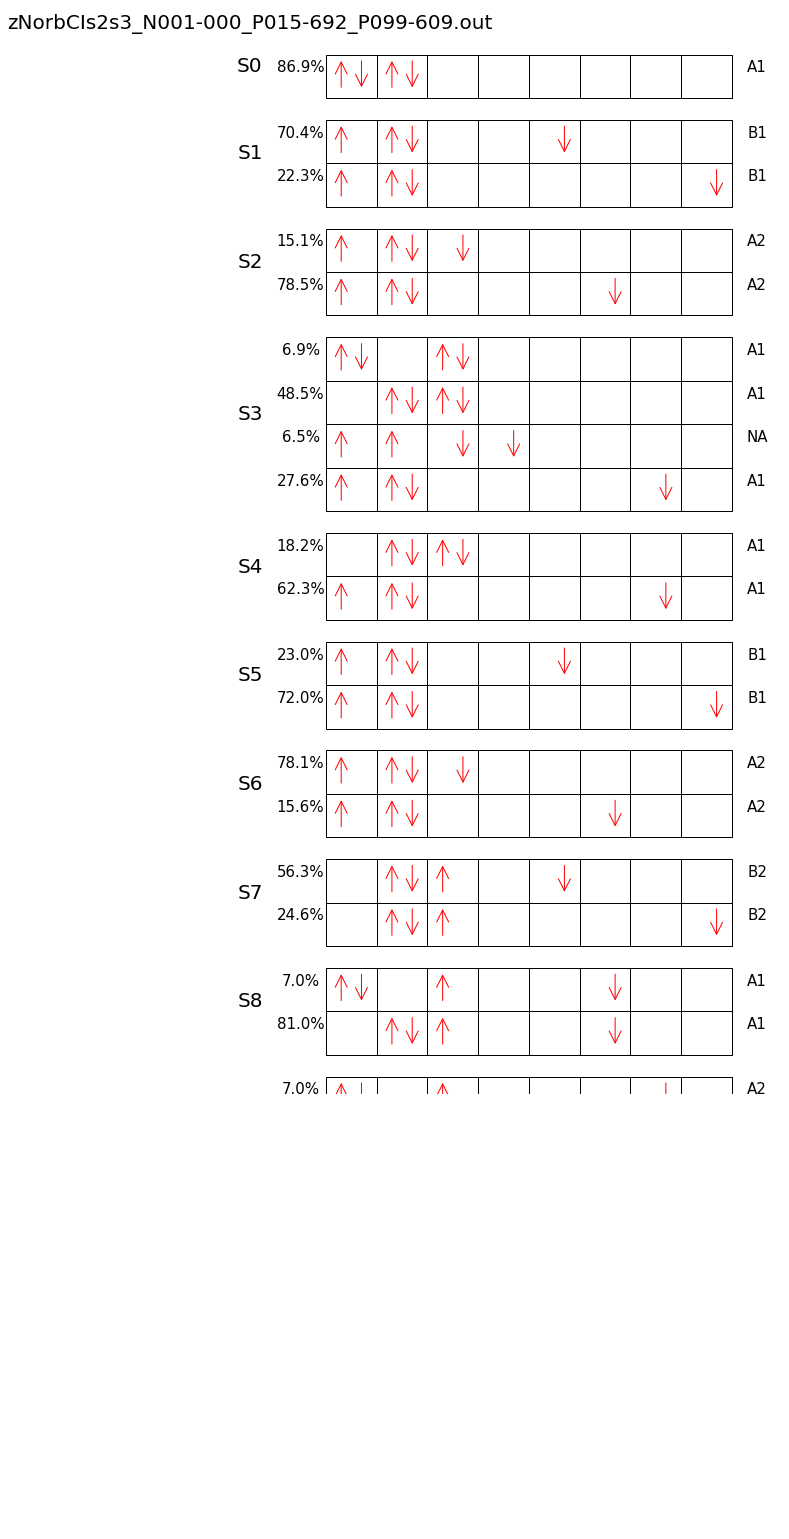

In [358]:
#out = '/home/alessio/a-DETERMINANTS/zNorbornadiene_N001-000_P015-692_P099-609/zNorbornadiene_N001-000_P015-692_P099-609.out'
#out = '/home/alessio/a-DETERMINANTS/CI_calculations/LAST_POINT_SP/fromOpen_3_4.out'
out = '/home/alessio/a-DETERMINANTS/zNorbornadiene_N002-000_P016-308_P093-352/zNorbornadiene_N002-000_P016-308_P093-352.out'
out = '/home/alessio/a-DETERMINANTS/zNorbornadiene_N001-000_P015-692_P099-609/CI_S2_S3_optimization/SINGLEPOINT/zNorbCIs2s3_N001-000_P015-692_P099-609.out'
elements, out = parse_out_for_determinants(out)
visualize_determinants(elements,out)

In [291]:


thing = 'u200000d'
which_sym(thing)

'B1'